In [59]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter

In [78]:
# # root_folder = Path("./results") 

# dataset_names = ["femnist", "har", "mnist", "pminst", "shakespeare", "vsn"]
# folders = {"femnist_K100_C10_E20": ["femnist_fedprox_K100_C10_E20_g20201013-184928_4_0_e20201013-184953", 
#                                      "femnist_fedprox_K100_C10_E20_g20201013-184928_6_0_e20201013-185124",
#                                      "femnist_virtual_natural_K100_C10_E20_g20201010-194222_5_0_e20201010-194302",
#                                      "femnist_virtual_natural_K100_C10_E20_g20201013-161600_2_0_e20201013-164722",
#                                      "femnist_fedprox_K100_C10_E100_g20201011-175913_21_0_e20201011-180339", 
#                                      "femnist_fedprox_K100_C10_E100_g20201011-175913_29_0_e20201011-180548",
#                                      "femnist_virtual_natural_K100_C10_E100_g20201011-174008_0_0_e20201011-174036",
#                                      "femnist_virtual_natural_K100_C10_E100_g20201014-002954_1_0_e20201014-003024"],
#            "har_K30_C10_E20": ["har_fedprox_K30_C3_E20_g20201014-014640_0_0_e20201014-014655", 
#                                "har_fedprox_K30_C3_E20_g20201014-014640_7_0_e20201014-014654",
#                                "har_virtual_natural_K30_C3_E20_g20201014-014756_18_0_e20201014-014827",
#                                "har_virtual_natural_K30_C3_E20_g20201014-014756_19_0_e20201014-014826"],
#            "mnist_K100_C10_E20": ["mnist_fedprox_K100_C10_E20_g20201013-004116_0_0_e20201013-004155", 
#                                   "mnist_fedprox_K100_C10_E20_g20201013-004116_1_0_e20201013-004154",
#                                   "mnist_virtual_natural_K100_C10_E20_g20201013-230404_0_0_e20201013-230422",
#                                   "mnist_virtual_natural_K100_C10_E20_g20201013-152408_5_0_e20201013-154510"],
#            "pmnist_K100_C10_E20": ["pmnist_fedprox_K100_C10_E20_g20201013-144526_3_0_e20201013-144612", 
#                                    "pmnist_fedprox_K100_C10_E20_g20201013-144526_4_0_e20201013-144613",
#                                    "pmnist_virtual_natural_K100_C10_E20_g20201013-232728_0_0_e20201013-232754",
#                                    "pmnist_virtual_natural_K100_C10_E20_g20201013-232728_1_0_e20201013-232754"],
#            "shakespeare_K100_C10_E20": ["shakespeare_fedprox_K100_C10_E20_g20201013-214821_0_0_e20201013-214852", 
#                                         "shakespeare_fedprox_K100_C10_E20_g20201013-003759_2_0_e20201013-003956",
#                                         "shakespeare_virtual_natural_K100_C10_E20_g20201013-214526_0_0_e20201013-214553",
#                                         "shakespeare_virtual_natural_K100_C10_E20_g20201013-214526_1_0_e20201013-214553"],
#            "vsn_K23_C10_E20": ["vsn_fedprox_K23_C10_E20_g20201014-020200_0_0_e20201014-020225", 
#                                "vsn_fedprox_K23_C10_E20_g20201014-020200_6_0_e20201014-020225",
#                                "vsn_virtual_natural_K23_C10_E20_g20201014-020419_4_0_e20201014-020455",
#                                "vsn_virtual_natural_K23_C10_E20_g20201014-020419_27_0_e20201014-020456"]
#           }
# pretty_names = ["FedAvg", "FedProx", "Virtual", "Virtual kl optimized",
#                 "FedAvg 100", "FedProx 100", "Virtual 100", "Virtual kl optimized 100"]  # This line happens only for femnist with 100 epochs per round
# metrics = ["server_losses", "all_client_losses"]

# assert len(dataset_names) == len(folders.keys())

In [154]:
# Set variables below accordingly
root_folder = Path("./results") 

dataset_names = ["FEMNIST", "HAR", "MNIST", "PMNIST", "SHAKESPEARE", "VSN"]
folders = {"femnist_K100_C10_E20": ["femnist_fedprox_K100_C10_E20_g20201013-184928_4_0_e20201013-184953", 
                                     "femnist_fedprox_K100_C10_E20_g20201013-184928_6_0_e20201013-185124",
                                     "femnist_virtual_natural_K100_C10_E20_g20201010-194222_5_0_e20201010-194302",
                                     #"femnist_fedprox_K100_C10_E100_g20201011-175913_21_0_e20201011-180339", 
                                     #"femnist_fedprox_K100_C10_E100_g20201011-175913_29_0_e20201011-180548",
                                     #"femnist_virtual_natural_K100_C10_E100_g20201011-174008_0_0_e20201011-174036"
                                   ],
           "har_K30_C10_E20": ["har_fedprox_K30_C3_E20_g20201014-014640_0_0_e20201014-014655", 
                               "har_fedprox_K30_C3_E20_g20201014-014640_7_0_e20201014-014654",
                               "har_virtual_natural_K30_C3_E20_g20201014-014756_18_0_e20201014-014827"],
           "mnist_K100_C10_E20": ["mnist_fedprox_K100_C10_E20_g20201013-004116_0_0_e20201013-004155", 
                                  "mnist_fedprox_K100_C10_E20_g20201013-004116_1_0_e20201013-004154",
                                  "mnist_virtual_natural_K100_C10_E20_g20201013-230404_0_0_e20201013-230422"],
           "pmnist_K100_C10_E20": ["pmnist_fedprox_K100_C10_E20_g20201013-144526_3_0_e20201013-144612", 
                                   "pmnist_fedprox_K100_C10_E20_g20201013-144526_4_0_e20201013-144613",
                                   "pmnist_virtual_natural_K100_C10_E20_g20201013-232728_0_0_e20201013-232754"],
           "shakespeare_K100_C10_E20": ["shakespeare_fedprox_K100_C10_E20_g20201013-214821_0_0_e20201013-214852", 
                                        "shakespeare_fedprox_K100_C10_E20_g20201013-003759_2_0_e20201013-003956",
                                        "shakespeare_virtual_natural_K100_C10_E20_g20201013-214526_0_0_e20201013-214553"],
           "vsn_K23_C10_E20": ["vsn_fedprox_K23_C10_E20_g20201014-020200_0_0_e20201014-020225", 
                               "vsn_fedprox_K23_C10_E20_g20201014-020200_6_0_e20201014-020225",
                               "vsn_virtual_natural_K23_C10_E20_g20201014-020419_4_0_e20201014-020455"]
          }
pretty_names = ["FedAvg", "FedProx", "Virtual",
                "FedAvg 100", "FedProx 100", "Virtual 100"]  # This line happens only for femnist with 100 epochs per round
colors = ['rosybrown', 'darkred', 'midnightblue']
lines = ['dashed', 'dashdot', 'solid']
metrics = ["server_losses", "all_client_losses"]
pretty_name_metrics = {"server_losses": 'Server Cross Entropy', "all_client_losses": "MTL Cross Entropy"}
assert len(dataset_names) == len(folders.keys())

In [165]:
def plot_curves(axe, curve, name="", title="", ylabel="", xlabel="rounds", color=None, linestyle=None, ylim=None):
    c2 = curve[curve > 0]
    c, = axe.plot(c2, color=color, linestyle=linestyle)
    c.set_label(name)
    axe.set_ylim(ylim)
    return c

/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


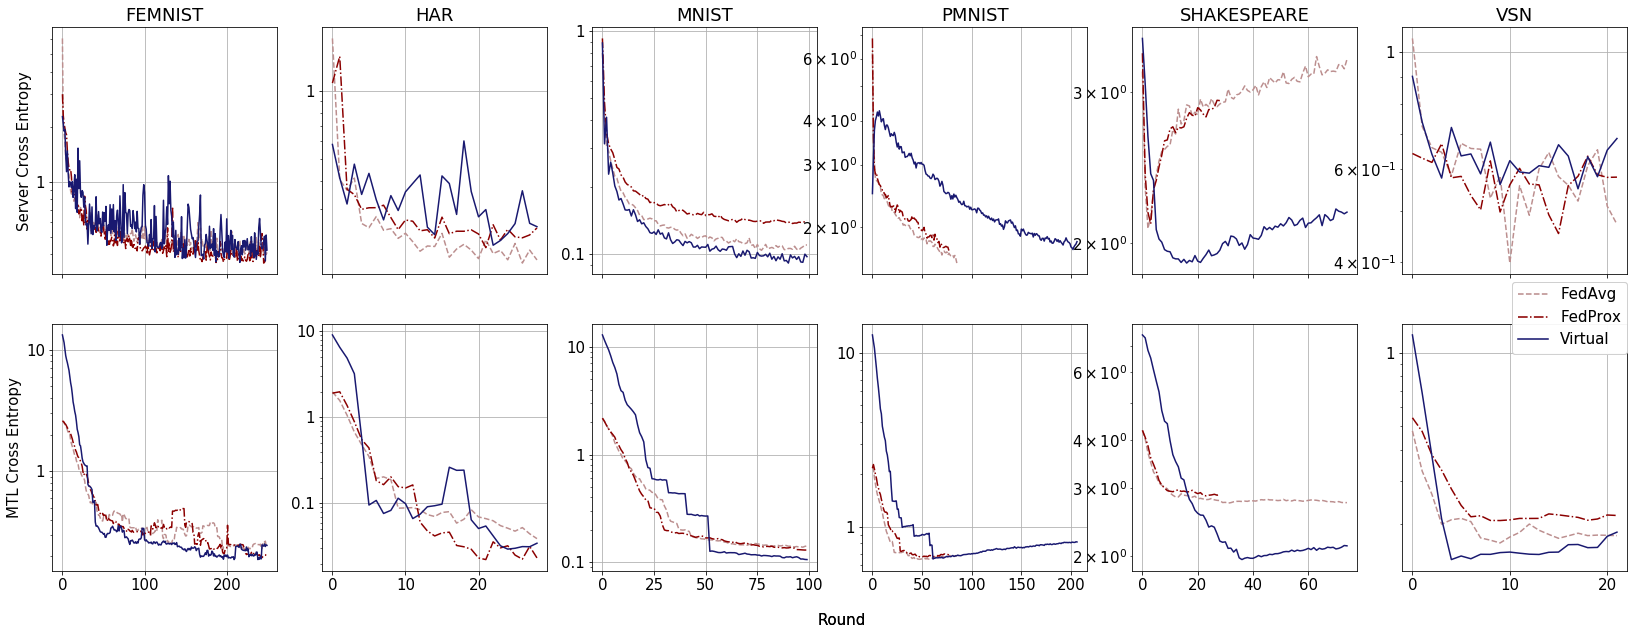

In [155]:
f, axes = plt.subplots(2, len(folders.keys()), figsize=(25, 10), sharex='col')
matplotlib.rcParams.update({'font.size': 15, 'font.serif': 'DejaVuSans'})
for i, metric in enumerate(metrics):
    for j, dataset in enumerate(folders.items()):
        plots = []
        for k, mod in enumerate(dataset[1]):
            curve_file = str((root_folder / dataset[0] / mod) / metric) + ".npy"
            curve = np.load(curve_file)  # Load file
            if i == 0:
                title = dataset_names[j]
            else:
                title = None
            c = plot_curves(axes[i][j], curve,
                            name=pretty_names[k], 
                            title=title,
                            color=colors[k],
                            linestyle=lines[k])
            plots.append(c)
        if j==0:
            f.legend(plots, labels=pretty_names[0:3], loc="center right")
            plt.subplots_adjust(right=1.0, wspace=0.2)
        if i ==0:
            axes[i][j].set_title(title)
        
        axes[i][j].set_yscale('log')
        axes[i][j].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
        axes[i][j].grid()
    
    axes[i][0].set_ylabel(pretty_name_metrics[metric])
    f.text(0.55, +0.05,'Round', size=15)

plt.savefig("losses.pdf", bbox_inches='tight', format='pdf')

In [171]:
metrics = ["server_accs", "all_client_accs"]
pretty_name_metrics = {"server_accs": 'Server Accuracy', "all_client_accs": "MTL Accuracy"}
y_lim = {"FEMNIST": (0.8,0.96), 
         "HAR": (0.85, 0.995), 
         "MNIST": (0.94,0.98), 
         "PMNIST": None, 
         "SHAKESPEARE": None, 
         "VSN": (0.85, 0.95)}

/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


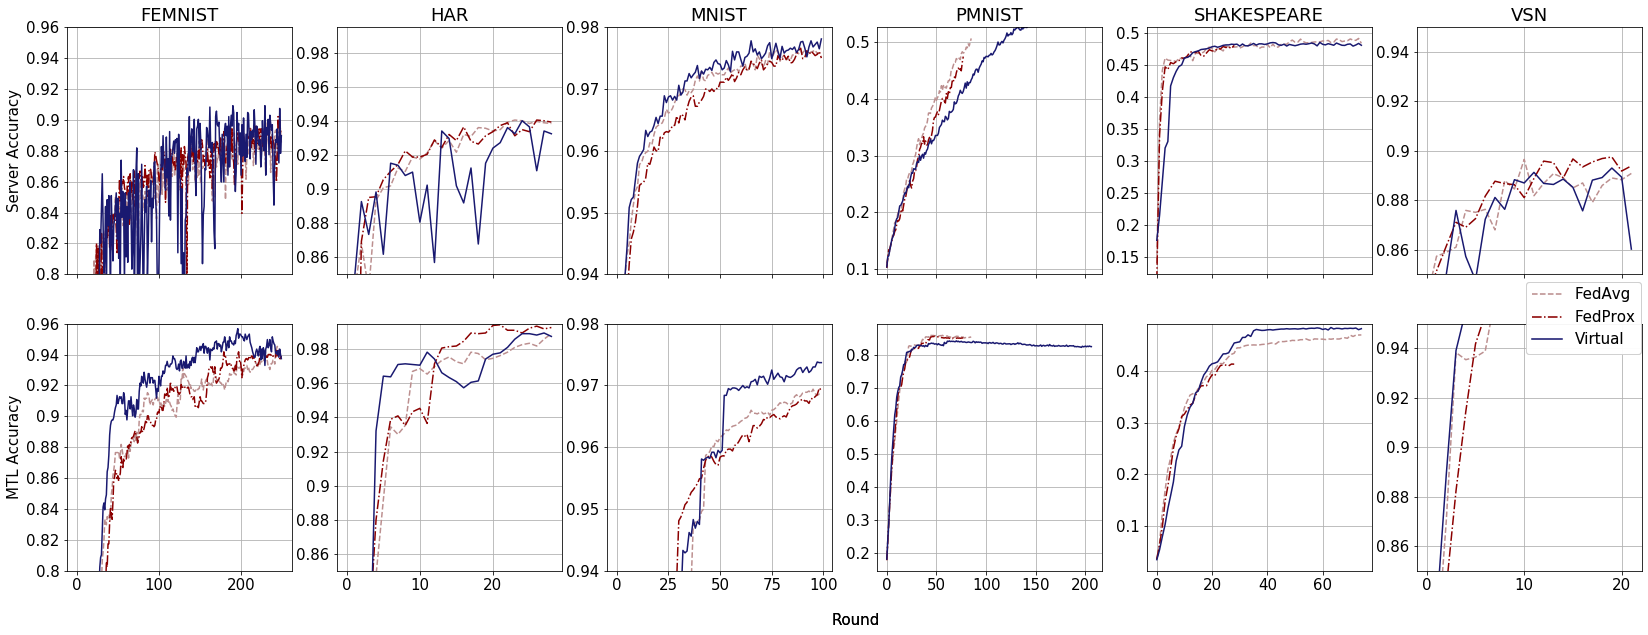

In [172]:
f, axes = plt.subplots(2, len(folders.keys()), figsize=(25, 10), sharex='col')
matplotlib.rcParams.update({'font.size': 15, 'font.serif': 'DejaVuSans'})
for i, metric in enumerate(metrics):
    for j, dataset in enumerate(folders.items()):
        plots = []
        for k, mod in enumerate(dataset[1]):
            curve_file = str((root_folder / dataset[0] / mod) / metric) + ".npy"
            curve = np.load(curve_file)  # Load file
            if i == 0:
                title = dataset_names[j]
            else:
                title = None
            c = plot_curves(axes[i][j], curve,
                            name=pretty_names[k], 
                            title=title,
                            color=colors[k],
                            linestyle=lines[k], 
                            ylim=y_lim[dataset_names[j]])
            plots.append(c)
        if j==0:
            f.legend(plots, labels=pretty_names[0:3], loc="center right")
            plt.subplots_adjust(right=1.0, wspace=0.2)
        if i ==0:
            axes[i][j].set_title(title)
        
        axes[i][j].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
        axes[i][j].grid()
    
    axes[i][0].set_ylabel(pretty_name_metrics[metric])
    f.text(0.55, +0.05,'Round', size=15)

axes[0][5].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

#plt.show()
plt.savefig("accuracies.pdf", bbox_inches='tight', format='pdf')